# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [3]:
!pip install --upgrade scikit-learn

In [44]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report

In [6]:
df = pd.read_csv('/content/demo01_preparado.csv')

In [7]:
X = df.drop('mau', axis=1)
y = df['mau']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [9]:
print(f"Tamanho do conjunto de treinamento: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

Tamanho do conjunto de treinamento: 11655 amostras
Tamanho do conjunto de teste: 4995 amostras


In [57]:
df.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,True,True,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,False,True,False,False,False,True,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,True,False,False,False,True,False,False,False,False


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [34]:
clf = DecisionTreeClassifier(random_state=123)

In [35]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

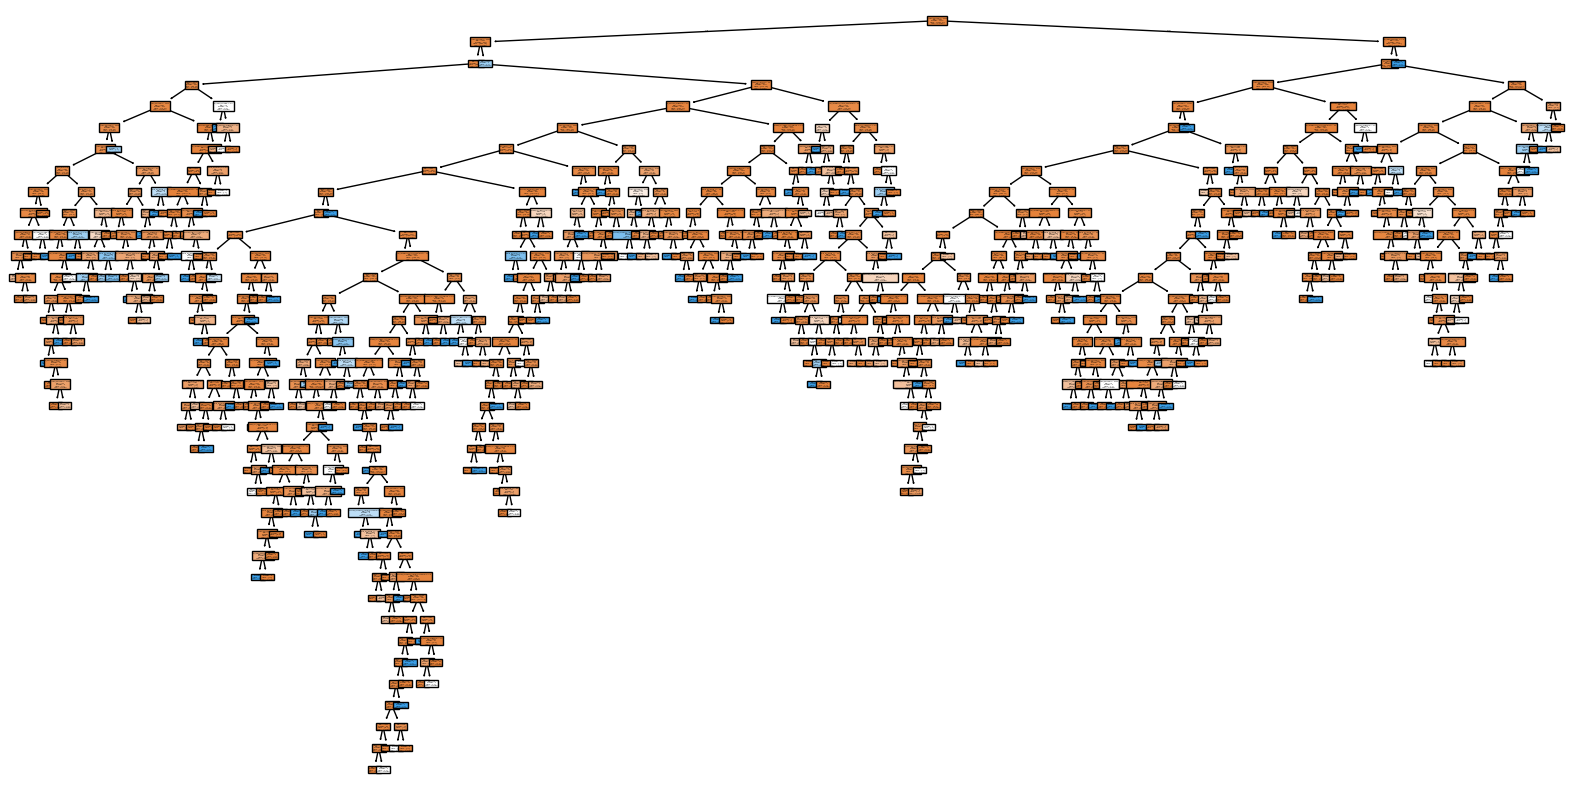

In [36]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Aprovado", "Reprovado"])
plt.show()

In [38]:
y_pred_train = clf.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Aprovado", "Reprovado"])

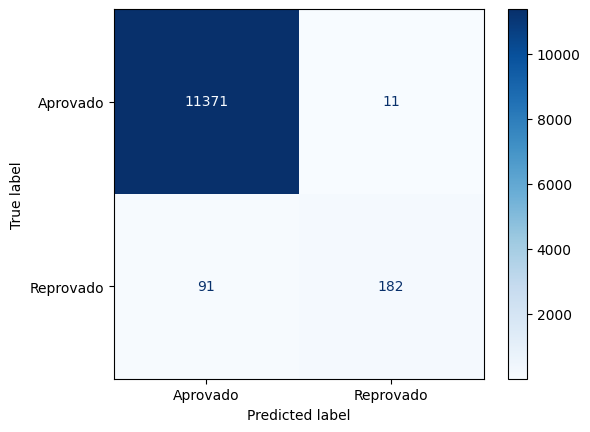

In [39]:
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [40]:
acuracia_train = accuracy_score(y_train, y_pred_train)
print(f"Acurácia na base de treinamento: {acuracia_train:.2f}")

Acurácia na base de treinamento: 0.99


In [41]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

Matriz de Confusão - Treinamento


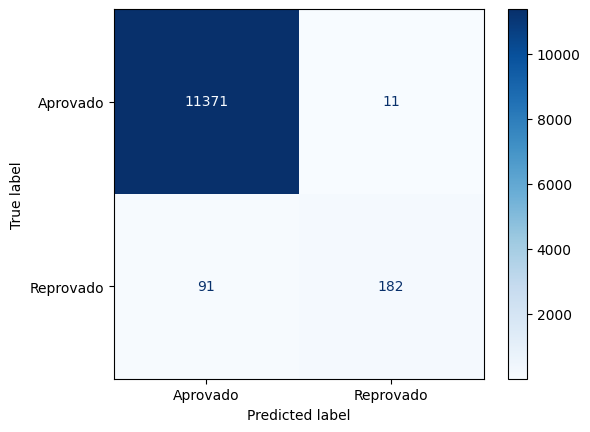

In [42]:
print("Matriz de Confusão - Treinamento")
cm_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=["Aprovado", "Reprovado"])
disp_train.plot(cmap=plt.cm.Blues)
plt.show()

In [45]:
print("Relatório de Classificação - Treinamento")
print(classification_report(y_train, y_pred_train, target_names=["Aprovado", "Reprovado"]))

Relatório de Classificação - Treinamento
              precision    recall  f1-score   support

    Aprovado       0.99      1.00      1.00     11382
   Reprovado       0.94      0.67      0.78       273

    accuracy                           0.99     11655
   macro avg       0.97      0.83      0.89     11655
weighted avg       0.99      0.99      0.99     11655



Matriz de Confusão - Teste


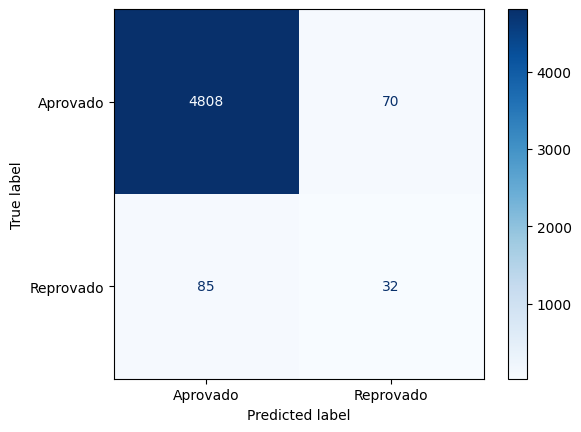

In [46]:
print("Matriz de Confusão - Teste")
cm_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["Aprovado", "Reprovado"])
disp_test.plot(cmap=plt.cm.Blues)
plt.show()

In [47]:
print("Relatório de Classificação - Teste")
print(classification_report(y_test, y_pred_test, target_names=["Aprovado", "Reprovado"]))

Relatório de Classificação - Teste
              precision    recall  f1-score   support

    Aprovado       0.98      0.99      0.98      4878
   Reprovado       0.31      0.27      0.29       117

    accuracy                           0.97      4995
   macro avg       0.65      0.63      0.64      4995
weighted avg       0.97      0.97      0.97      4995



In [48]:
acuracia_train = accuracy_score(y_train, y_pred_train)
acuracia_test = accuracy_score(y_test, y_pred_test)
print(f"Acurácia na base de treinamento: {acuracia_train:.2f}")
print(f"Acurácia na base de teste: {acuracia_test:.2f}")

Acurácia na base de treinamento: 0.99
Acurácia na base de teste: 0.97


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [50]:
modelo = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

In [53]:
y_pred_test = modelo.predict(X_test)

In [54]:
print("Matriz de Confusão - Teste:")
print(confusion_matrix(y_test, y_pred_test))

Matriz de Confusão - Teste:
[[4869    9]
 [ 108    9]]


In [55]:
print("\nRelatório de Classificação - Teste:")
print(classification_report(y_test, y_pred_test, target_names=["Aprovado", "Reprovado"]))


Relatório de Classificação - Teste:
              precision    recall  f1-score   support

    Aprovado       0.98      1.00      0.99      4878
   Reprovado       0.50      0.08      0.13       117

    accuracy                           0.98      4995
   macro avg       0.74      0.54      0.56      4995
weighted avg       0.97      0.98      0.97      4995



In [56]:
acuracia_test = accuracy_score(y_test, y_pred_test)
print(f"Acurácia na base de teste: {acuracia_test:.2f}")

Acurácia na base de teste: 0.98


In [59]:
# Calcular a proporção de proponentes classificados como 'maus' na base de dados
total_maous_base = df[df['mau'] == True].shape[0]
total_proponentes = df.shape[0]
proporcao_maous_base = total_maous_base / total_proponentes
print("Proporção de proponentes classificados como 'maus' na base de df:", proporcao_maous_base)


Proporção de proponentes classificados como 'maus' na base de df: 0.023423423423423424


In [60]:
total_bons_base = df[df['mau'] == False].shape[0]

total_contratos_base = df.shape[0]

acuracia_base = total_bons_base / total_contratos_base
print("Acurácia se todos os contratos fossem classificados como 'bons':", acuracia_base)

Acurácia se todos os contratos fossem classificados como 'bons': 0.9765765765765766
